In [2]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [3]:
file = 'selatmalaka.nc4'
ds = Dataset(file)
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    classification_level: UNCLASSIFIED
    distribution_statement: Approved for public release. Distribution unlimited.
    downgrade_date: not applicable
    classification_authority: not applicable
    institution: Naval Oceanographic Office
    source: HYCOM archive file
    history: archv2ncdf3z
    field_type: instantaneous
    Conventions: CF-1.6 NAVO_netcdf_v1.1
    History: Translated to CF-1.0 Conventions by Netcdf-Java CDM (CFGridWriter2)
Original Dataset = GLBu0.08/expt_91.2/ts3z; Translation Date = 2021-12-07T13:22:42.437Z
    geospatial_lat_min: 0.47999998927116394
    geospatial_lat_max: 5.519999980926514
    geospatial_lon_min: 95.52001953125
    geospatial_lon_max: 104.9599609375
    dimensions(sizes): time(28), depth(40), lat(64), lon(119)
    variables(dimensions): int16 water_temp(time, depth, lat, lon), float64 time(time), float64 depth(depth), float64 lat(lat), float64 lon(lon)
  

In [4]:
sst = ds.variables['water_temp'][0,0,:,:]
lats = ds.variables['lat'][:]
lons = ds.variables['lon'][:]
depth = ds.variables['depth'][:]
time = ds.variables['time'][:]
ds.close()

In [5]:
lon_0 = lons.mean()
lat_0 = lats.mean()
m = Basemap(projection='mill',lat_ts=10,llcrnrlon=95.5, \
           urcrnrlon=105,llcrnrlat=0.5,urcrnrlat=5.5,resolution='h')
Lon, Lat = np.meshgrid(lons,lats)
x, y = m(Lon, Lat)

{95.5: ([<matplotlib.lines.Line2D at 0x23596d08a00>],
  [Text(1056.351305704471, -10563.51305704471, '95.5°E')]),
 96.5: ([<matplotlib.lines.Line2D at 0x23596d2a670>],
  [Text(111973.23840467393, -10563.51305704471, '96.5°E')]),
 97.5: ([<matplotlib.lines.Line2D at 0x23596d2a940>],
  [Text(222890.1255036434, -10563.51305704471, '97.5°E')]),
 98.5: ([<matplotlib.lines.Line2D at 0x23596d2ac10>],
  [Text(333807.01260261284, -10563.51305704471, '98.5°E')]),
 99.5: ([<matplotlib.lines.Line2D at 0x23596d2aee0>],
  [Text(445780.2510072868, -10563.51305704471, '99.5°E')]),
 100.5: ([<matplotlib.lines.Line2D at 0x23596d201f0>],
  [Text(556697.1381062563, -10563.51305704471, '100.5°E')]),
 101.5: ([<matplotlib.lines.Line2D at 0x23596d204c0>],
  [Text(667614.0252052257, -10563.51305704471, '101.5°E')]),
 102.5: ([<matplotlib.lines.Line2D at 0x23596d20790>],
  [Text(778530.9123041952, -10563.51305704471, '102.5°E')]),
 103.5: ([<matplotlib.lines.Line2D at 0x23596d20a60>],
  [Text(890504.1507088691

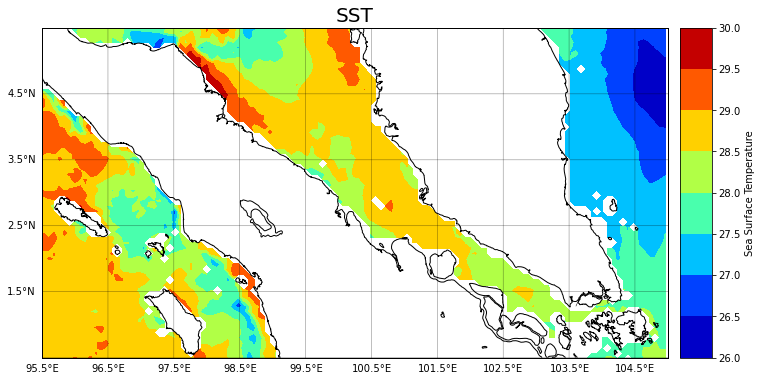

In [6]:
fig = plt.figure(figsize=(12,9))
m.drawcountries()
m.drawcoastlines()
m.drawmapboundary()
m.contourf(x,y,sst,cmap=plt.cm.jet)
b = m.colorbar()
b.set_label('Sea Surface Temperature',rotation=90)
meridians = np.arange(Lon.min(),Lon.max(),5)
parallels = np.arange(Lat.min(),Lat.max(),5)
plt.title('SST',fontsize=20)
m.drawparallels(np.arange(0.5, 5.5, 1), labels = [1, 0, 0, 0], linewidth =0.5, color = 'k')
m.drawmeridians(np.arange(95.5, 105, 1), labels = [0, 0, 0, 1], linewidth =0.5, color = 'k')


In [20]:
#plt.savefig('selatmalaka.PNG', bbox_inches = 'tight', dpi = 200, pad_inches = 0.5)

<Figure size 432x288 with 0 Axes>

In [7]:
file = 'selatmakassar.nc4'
ds = Dataset(file)
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    classification_level: UNCLASSIFIED
    distribution_statement: Approved for public release. Distribution unlimited.
    downgrade_date: not applicable
    classification_authority: not applicable
    institution: Naval Oceanographic Office
    source: HYCOM archive file
    history: archv2ncdf3z
    field_type: instantaneous
    Conventions: CF-1.6 NAVO_netcdf_v1.1
    History: Translated to CF-1.0 Conventions by Netcdf-Java CDM (CFGridWriter2)
Original Dataset = GLBu0.08/expt_91.2/ts3z; Translation Date = 2021-12-07T13:24:06.951Z
    geospatial_lat_min: -2.9600000381469727
    geospatial_lat_max: 1.0399999618530273
    geospatial_lon_min: 116.0
    geospatial_lon_max: 120.47998046875
    dimensions(sizes): time(28), depth(40), lat(51), lon(57)
    variables(dimensions): int16 water_temp(time, depth, lat, lon), float64 time(time), float64 depth(depth), float64 lat(lat), float64 lon(lon)
    groups

In [8]:
sst = ds.variables['water_temp'][0,0,:,:]
lats = ds.variables['lat'][:]
lons = ds.variables['lon'][:]
depth = ds.variables['depth'][:]
time = ds.variables['time'][:]
ds.close()

In [11]:
lon_0 = lons.mean()
lat_0 = lats.mean()
m = Basemap(projection='mill',lat_ts=10,llcrnrlon=116, \
           urcrnrlon=120.5,llcrnrlat=-3,urcrnrlat=1,resolution='h')
Lon, Lat = np.meshgrid(lons,lats)
x, y = m(Lon, Lat)

{116.0: ([<matplotlib.lines.Line2D at 0x23596f160a0>],
  [Text(500.3769342810653, -5003.769342810654, '116°E')]),
 117.0: ([<matplotlib.lines.Line2D at 0x23596f16d60>],
  [Text(111584.05634467756, -5003.769342810654, '117°E')]),
 118.0: ([<matplotlib.lines.Line2D at 0x23596f23070>],
  [Text(222667.73575507407, -5003.769342810654, '118°E')]),
 119.0: ([<matplotlib.lines.Line2D at 0x23596f23340>],
  [Text(333751.41516547056, -5003.769342810654, '119°E')]),
 120.0: ([<matplotlib.lines.Line2D at 0x23596f23610>],
  [Text(444835.09457586706, -5003.769342810654, '120°E')])}

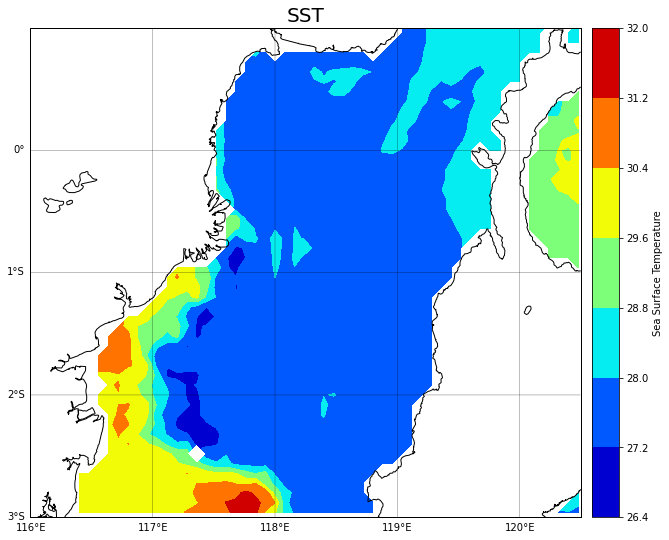

In [12]:
fig = plt.figure(figsize=(12,9))
m.drawcountries()
m.drawcoastlines()
m.drawmapboundary()
m.contourf(x,y,sst,cmap=plt.cm.jet)
b = m.colorbar()
b.set_label('Sea Surface Temperature',rotation=90)
meridians = np.arange(Lon.min(),Lon.max(),5)
parallels = np.arange(Lat.min(),Lat.max(),5)
plt.title('SST',fontsize=20)
m.drawparallels(np.arange(-3, 1, 1), labels = [1, 0, 0, 0], linewidth =0.5, color = 'k')
m.drawmeridians(np.arange(116, 120.5, 1), labels = [0, 0, 0, 1], linewidth =0.5, color = 'k')

In [13]:
#plt.savefig('selatmakassar.PNG', bbox_inches = 'tight', dpi = 200, pad_inches = 0.5)

In [14]:
file = 'bob.nc4'
ds = Dataset(file)
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    classification_level: UNCLASSIFIED
    distribution_statement: Approved for public release. Distribution unlimited.
    downgrade_date: not applicable
    classification_authority: not applicable
    institution: Naval Oceanographic Office
    source: HYCOM archive file
    history: archv2ncdf3z
    field_type: instantaneous
    Conventions: CF-1.6 NAVO_netcdf_v1.1
    History: Translated to CF-1.0 Conventions by Netcdf-Java CDM (CFGridWriter2)
Original Dataset = GLBu0.08/expt_91.2/ts3z; Translation Date = 2021-12-07T13:25:03.929Z
    geospatial_lat_min: 5.519999980926514
    geospatial_lat_max: 24.639999389648438
    geospatial_lon_min: 78.1600341796875
    geospatial_lon_max: 96.719970703125
    dimensions(sizes): time(28), depth(40), lat(240), lon(233)
    variables(dimensions): int16 water_temp(time, depth, lat, lon), float64 time(time), float64 depth(depth), float64 lat(lat), float64 lon(lon)

In [15]:
sst = ds.variables['water_temp'][0,0,:,:]
lats = ds.variables['lat'][:]
lons = ds.variables['lon'][:]
depth = ds.variables['depth'][:]
time = ds.variables['time'][:]
ds.close()

In [21]:
lon_0 = lons.mean()
lat_0 = lats.mean()
m = Basemap(projection='mill',lat_ts=10,llcrnrlon=78.2, \
           urcrnrlon=96.7,llcrnrlat=5.5,urcrnrlat=24.6,resolution='h')
Lon, Lat = np.meshgrid(lons,lats)
x, y = m(Lon, Lat)

{78.2: ([<matplotlib.lines.Line2D at 0x23598d82ac0>],
  [Text(2057.105174266602, -23073.753378292815, '78.2°E')]),
 81.2: ([<matplotlib.lines.Line2D at 0x23598d8ec40>],
  [Text(335308.1434054561, -23073.753378292815, '81.2°E')]),
 84.2: ([<matplotlib.lines.Line2D at 0x23598d8ef10>],
  [Text(668559.1816366456, -23073.753378292815, '84.2°E')]),
 87.2: ([<matplotlib.lines.Line2D at 0x23598d95220>],
  [Text(1001810.219867835, -23073.753378292815, '87.2°E')]),
 90.2: ([<matplotlib.lines.Line2D at 0x23598d954f0>],
  [Text(1335061.2580990246, -23073.753378292815, '90.2°E')]),
 93.2: ([<matplotlib.lines.Line2D at 0x23598d957c0>],
  [Text(1668312.296330214, -23073.753378292815, '93.2°E')]),
 96.2: ([<matplotlib.lines.Line2D at 0x23598d95a90>],
  [Text(2001563.3345614036, -23073.753378292815, '96.2°E')])}

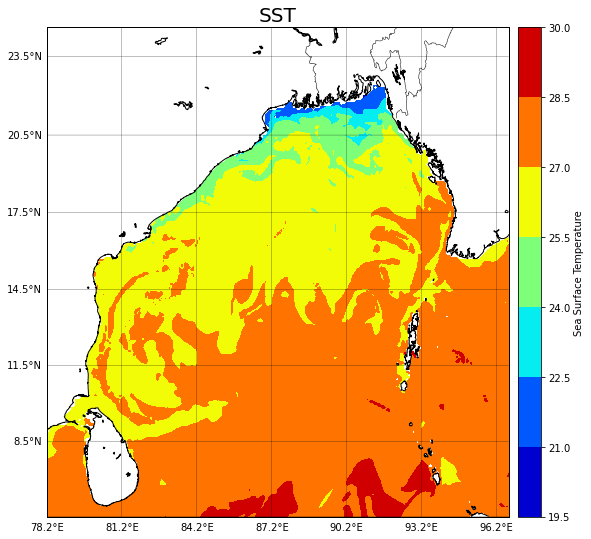

In [22]:
fig = plt.figure(figsize=(12,9))
m.drawcountries()
m.drawcoastlines()
m.drawmapboundary()
m.contourf(x,y,sst,cmap=plt.cm.jet)
b = m.colorbar()
b.set_label('Sea Surface Temperature',rotation=90)
meridians = np.arange(Lon.min(),Lon.max(),5)
parallels = np.arange(Lat.min(),Lat.max(),5)
plt.title('SST',fontsize=20)
m.drawparallels(np.arange(5.5, 24.6, 3), labels = [1, 0, 0, 0], linewidth =0.5, color = 'k')
m.drawmeridians(np.arange(78.2, 96.7, 3), labels = [0, 0, 0, 1], linewidth =0.5, color = 'k')

In [24]:
#plt.savefig('BOB.PNG', bbox_inches = 'tight', dpi = 200, pad_inches = 0.5)